<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_01_Arboles/01_%C3%81rboles_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Árboles de Decisión
Explicación de cómo construír árboles de decisión.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/16tnAAaiT6mrelG8zRg26crXAChWmzjOG2NyA0oyh4X0/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_A___Analisis_univariante.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset de accidentes cardiacos
Para probar a hacer árboles de decisión utilizaremos un dataset sobre accidentes coronarios que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)). 

Podéis encontrar el archivo listo para importar en mi github: 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/heart_failure.csv'. 

Importa este dataset en un dataframe llamado **df**.

In [3]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/heart_failure.csv'

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# 03 Construcción árbol de decisión a mano
Nunca lo haremos en la vida real, pero para afianzar el entendimiento de este tipo de algoritmos, vamos a reproducir el proceso de entrenamiento a mano.

## 0301 DataFrame
Para simplificar, haremos esto con un dataframe consistente solo en las columnas ['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT'] renombradas como ['Edad', 'Anemia', 'Serum', 'Fallece'].

In [5]:
df_resumen = df[['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT']]
df_resumen.columns = ['Edad', 'Anemia', 'Serum', 'Fallece']
df_resumen.sample(10).reset_index(drop=True)

,Edad,Anemia,Serum,Fallece
0,70.0,0,1.1,0
1,49.0,0,1.1,1
2,65.0,0,1.0,1
3,60.0,0,6.8,1
4,70.0,0,1.3,1
5,50.0,1,0.7,0
6,65.0,0,1.7,0
7,70.0,0,1.2,0
8,58.0,1,1.3,0
9,80.0,0,1.3,1


## 0301 Seleccionamos el nodo raíz
Para seleccionar el nodo raíz generaremos árboles muy sencillos, de solo 3 nodos (una sola partición).

### 030101 Variable categórica
Probamos a generar un árbol de sólo dos particiones.

In [6]:
# Podemos hacer la partición Anemia = 1 y Anemia = 0 con un groupby
df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()

,Anemia,count,sum
0,0,170,50
1,1,129,46


In [7]:
# Guardamos el resultado y le damos nombres más explicativos a las columnas
df_i = df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()
df_i.columns = ['Anemia', 'Total', 'Fallece = 1']
df_i

,Anemia,Total,Fallece = 1
0,0,170,50
1,1,129,46


In [8]:
#Añadimos más información útil
df_i = df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()
df_i.columns = ['Anemia', 'Total', 'Fallece = 1']
df_i['Fallece = 0'] = df_i['Total'] - df_i['Fallece = 1']
df_i['Mean'] = np.round(df_i['Fallece = 1']/df_i['Total'], 4)
df_i

,Anemia,Total,Fallece = 1,Fallece = 0,Mean
0,0,170,50,120,0.2941
1,1,129,46,83,0.3566


#### EJERCICIO
Crea la función **particion_categorica** que, dado un dataframe con datos, una variable discreta binaria (como 'Anemia') y una variable target, devuelva un dataframe con información de la partición similar a la que acabamos de generar en la celda anterior.

In [9]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada.
  """
  df_i = df.groupby(var_discreta)[target].agg(['count', 'sum']).reset_index()
  df_i.columns = [var_discreta, 'Total', target + ' = 1']
  df_i[target + ' = 0'] = df_i['Total'] - df_i[target + ' = 1']
  df_i['Mean'] = np.round(df_i[target + ' = 1']/df_i['Total'], 4)
  return df_i

In [10]:
df_i = particion_categorica(df_resumen, 'Fallece', 'Anemia')
df_i

,Anemia,Total,Fallece = 1,Fallece = 0,Mean
0,0,170,50,120,0.2941
1,1,129,46,83,0.3566


### 030102 Variable Continua
Las variables continuas pueden dar lugar a diversas particiones. Veamos la variable 'Edad' como ejemplo.

In [11]:
# Cuantos valores distintos de edad hay?
df_resumen['Edad'].nunique()

47

In [12]:
# Valores distintos de edad en orden 
valores_edad_unicos_ordenados = df_resumen['Edad'].sort_values().unique()
valores_edad_unicos_ordenados 

array([40.   , 41.   , 42.   , 43.   , 44.   , 45.   , 46.   , 47.   ,
       48.   , 49.   , 50.   , 51.   , 52.   , 53.   , 54.   , 55.   ,
       56.   , 57.   , 58.   , 59.   , 60.   , 60.667, 61.   , 62.   ,
       63.   , 64.   , 65.   , 66.   , 67.   , 68.   , 69.   , 70.   ,
       72.   , 73.   , 75.   , 77.   , 78.   , 79.   , 80.   , 81.   ,
       82.   , 85.   , 86.   , 87.   , 90.   , 94.   , 95.   ])

In [13]:
# Por tanto hay 46 particiones posibles, en torno a los valores:
valores_particiones = (valores_edad_unicos_ordenados[:-1] + valores_edad_unicos_ordenados[1:])/2
valores_particiones

array([40.5   , 41.5   , 42.5   , 43.5   , 44.5   , 45.5   , 46.5   ,
       47.5   , 48.5   , 49.5   , 50.5   , 51.5   , 52.5   , 53.5   ,
       54.5   , 55.5   , 56.5   , 57.5   , 58.5   , 59.5   , 60.3335,
       60.8335, 61.5   , 62.5   , 63.5   , 64.5   , 65.5   , 66.5   ,
       67.5   , 68.5   , 69.5   , 71.    , 72.5   , 74.    , 76.    ,
       77.5   , 78.5   , 79.5   , 80.5   , 81.5   , 83.5   , 85.5   ,
       86.5   , 88.5   , 92.    , 94.5   ])

In [14]:
# Ahora, podemos hacer un árbol para cada valor de partición. 
# Por ejemplo, para la partición 63.5
df_resumen_i = df_resumen.copy(deep=True)

filtro_i = df_resumen_i['Edad'] > 63.5
df_resumen_i['Edad > 63.5'] = filtro_i.astype(int)

df_resumen_i.head()

,Edad,Anemia,Serum,Fallece,Edad > 63.5
0,75.0,0,1.9,1,1
1,55.0,0,1.1,1,0
2,65.0,0,1.3,1,1
3,50.0,1,1.9,1,0
4,65.0,1,2.7,1,1


In [15]:
# Ahora podemos generar la partición categórica sobre la oclumna Edad > 63.5
particion_categorica(df_resumen_i, 'Fallece', 'Edad > 63.5')

,Edad > 63.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,181,46,135,0.2541
1,1,118,50,68,0.4237


In [16]:
# Hagamos un loop que devuelva todas las particiones posibles
for particion in valores_particiones:
  df_resumen_i = df_resumen.copy(deep=True)

  filtro_i = df_resumen_i['Edad'] > particion
  df_resumen_i['Edad > ' + str(particion)] = filtro_i.astype(int)

  df_i = particion_categorica(df_resumen_i, 'Fallece', 'Edad > ' + str(particion))
  display(df_i)

,Edad > 40.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,7,0,7,0.0000
1,1,292,96,196,0.3288


,Edad > 41.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,8,0,8,0.0000
1,1,291,96,195,0.3299


,Edad > 42.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,15,1,14,0.0667
1,1,284,95,189,0.3345


,Edad > 43.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,16,1,15,0.0625
1,1,283,95,188,0.3357


,Edad > 44.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,18,1,17,0.0556
1,1,281,95,186,0.3381


,Edad > 45.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,37,7,30,0.1892
1,1,262,89,173,0.3397


,Edad > 46.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,40,8,32,0.2000
1,1,259,88,171,0.3398


,Edad > 47.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,41,8,33,0.1951
1,1,258,88,170,0.3411


,Edad > 48.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,43,10,33,0.2326
1,1,256,86,170,0.3359


,Edad > 49.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,47,11,36,0.2340
1,1,252,85,167,0.3373


,Edad > 50.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,74,19,55,0.2568
1,1,225,77,148,0.3422


,Edad > 51.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,78,20,58,0.2564
1,1,221,76,145,0.3439


,Edad > 52.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,83,20,63,0.2410
1,1,216,76,140,0.3519


,Edad > 53.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,93,21,72,0.2258
1,1,206,75,131,0.3641


,Edad > 54.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,95,22,73,0.2316
1,1,204,74,130,0.3627


,Edad > 55.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,112,25,87,0.2232
1,1,187,71,116,0.3797


,Edad > 56.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,113,25,88,0.2212
1,1,186,71,115,0.3817


,Edad > 57.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,115,26,89,0.2261
1,1,184,70,114,0.3804


,Edad > 58.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,125,28,97,0.2240
1,1,174,68,106,0.3908


,Edad > 59.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,129,31,98,0.2403
1,1,170,65,105,0.3824


,Edad > 60.3335,Total,Fallece = 1,Fallece = 0,Mean
0,0,162,44,118,0.2716
1,1,137,52,85,0.3796


,Edad > 60.8335,Total,Fallece = 1,Fallece = 0,Mean
0,0,164,45,119,0.2744
1,1,135,51,84,0.3778


,Edad > 61.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,168,45,123,0.2679
1,1,131,51,80,0.3893


,Edad > 62.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,173,46,127,0.2659
1,1,126,50,76,0.3968


,Edad > 63.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,181,46,135,0.2541
1,1,118,50,68,0.4237


,Edad > 64.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,184,46,138,0.2500
1,1,115,50,65,0.4348


,Edad > 65.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,210,54,156,0.2571
1,1,89,42,47,0.4719


,Edad > 66.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,212,54,158,0.2547
1,1,87,42,45,0.4828


,Edad > 67.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,214,54,160,0.2523
1,1,85,42,43,0.4941


,Edad > 68.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,219,56,163,0.2557
1,1,80,40,40,0.5000


,Edad > 69.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,222,58,164,0.2613
1,1,77,38,39,0.4935


,Edad > 71.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,247,65,182,0.2632
1,1,52,31,21,0.5962


,Edad > 72.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,254,70,184,0.2756
1,1,45,26,19,0.5778


,Edad > 74.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,258,71,187,0.2752
1,1,41,25,16,0.6098


,Edad > 76.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,269,77,192,0.2862
1,1,30,19,11,0.6333


,Edad > 77.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,271,78,193,0.2878
1,1,28,18,10,0.6429


,Edad > 78.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,273,78,195,0.2857
1,1,26,18,8,0.6923


,Edad > 79.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,274,78,196,0.2847
1,1,25,18,7,0.7200


,Edad > 80.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,281,83,198,0.2954
1,1,18,13,5,0.7222


,Edad > 81.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,282,83,199,0.2943
1,1,17,13,4,0.7647


,Edad > 83.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,285,86,199,0.3018
1,1,14,10,4,0.7143


,Edad > 85.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,291,89,202,0.3058
1,1,8,7,1,0.8750


,Edad > 86.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,292,90,202,0.3082
1,1,7,6,1,0.8571


,Edad > 88.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,293,91,202,0.3106
1,1,6,5,1,0.8333


,Edad > 92.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,296,93,203,0.3142
1,1,3,3,0,1.0000


,Edad > 94.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,297,94,203,0.3165
1,1,2,2,0,1.0000


#### EJERCICIO 
Crea la función **particiones_continuas** que, dado un dataframe con datos, una variable continua (como 'Edad' o 'Serum') y una variable target, muestre una serie de dataframes con información para cada una de las particiones. (Devuelve un resultado similar al que acabamos de generar en la celda anterior).

In [17]:
def particiones_continuas(df, target, var_continua):
  """
  Muestra una serie dataframes con información sobre las distintas particiones 
  posibles utilizando la variable continua aportada.
  """
  valores_edad_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_edad_unicos_ordenados[:-1] + 
                         valores_edad_unicos_ordenados[1:])/2

  for valor in valores_particiones:
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                'Fallece', 
                                str(var_continua) + ' > ' + str(valor))
    display(df_i)

In [18]:
particiones_continuas(df_resumen, 'Fallece', 'Edad')

,Edad > 40.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,7,0,7,0.0000
1,1,292,96,196,0.3288


,Edad > 41.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,8,0,8,0.0000
1,1,291,96,195,0.3299


,Edad > 42.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,15,1,14,0.0667
1,1,284,95,189,0.3345


,Edad > 43.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,16,1,15,0.0625
1,1,283,95,188,0.3357


,Edad > 44.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,18,1,17,0.0556
1,1,281,95,186,0.3381


,Edad > 45.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,37,7,30,0.1892
1,1,262,89,173,0.3397


,Edad > 46.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,40,8,32,0.2000
1,1,259,88,171,0.3398


,Edad > 47.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,41,8,33,0.1951
1,1,258,88,170,0.3411


,Edad > 48.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,43,10,33,0.2326
1,1,256,86,170,0.3359


,Edad > 49.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,47,11,36,0.2340
1,1,252,85,167,0.3373


,Edad > 50.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,74,19,55,0.2568
1,1,225,77,148,0.3422


,Edad > 51.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,78,20,58,0.2564
1,1,221,76,145,0.3439


,Edad > 52.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,83,20,63,0.2410
1,1,216,76,140,0.3519


,Edad > 53.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,93,21,72,0.2258
1,1,206,75,131,0.3641


,Edad > 54.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,95,22,73,0.2316
1,1,204,74,130,0.3627


,Edad > 55.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,112,25,87,0.2232
1,1,187,71,116,0.3797


,Edad > 56.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,113,25,88,0.2212
1,1,186,71,115,0.3817


,Edad > 57.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,115,26,89,0.2261
1,1,184,70,114,0.3804


,Edad > 58.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,125,28,97,0.2240
1,1,174,68,106,0.3908


,Edad > 59.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,129,31,98,0.2403
1,1,170,65,105,0.3824


,Edad > 60.3335,Total,Fallece = 1,Fallece = 0,Mean
0,0,162,44,118,0.2716
1,1,137,52,85,0.3796


,Edad > 60.8335,Total,Fallece = 1,Fallece = 0,Mean
0,0,164,45,119,0.2744
1,1,135,51,84,0.3778


,Edad > 61.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,168,45,123,0.2679
1,1,131,51,80,0.3893


,Edad > 62.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,173,46,127,0.2659
1,1,126,50,76,0.3968


,Edad > 63.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,181,46,135,0.2541
1,1,118,50,68,0.4237


,Edad > 64.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,184,46,138,0.2500
1,1,115,50,65,0.4348


,Edad > 65.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,210,54,156,0.2571
1,1,89,42,47,0.4719


,Edad > 66.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,212,54,158,0.2547
1,1,87,42,45,0.4828


,Edad > 67.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,214,54,160,0.2523
1,1,85,42,43,0.4941


,Edad > 68.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,219,56,163,0.2557
1,1,80,40,40,0.5000


,Edad > 69.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,222,58,164,0.2613
1,1,77,38,39,0.4935


,Edad > 71.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,247,65,182,0.2632
1,1,52,31,21,0.5962


,Edad > 72.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,254,70,184,0.2756
1,1,45,26,19,0.5778


,Edad > 74.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,258,71,187,0.2752
1,1,41,25,16,0.6098


,Edad > 76.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,269,77,192,0.2862
1,1,30,19,11,0.6333


,Edad > 77.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,271,78,193,0.2878
1,1,28,18,10,0.6429


,Edad > 78.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,273,78,195,0.2857
1,1,26,18,8,0.6923


,Edad > 79.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,274,78,196,0.2847
1,1,25,18,7,0.7200


,Edad > 80.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,281,83,198,0.2954
1,1,18,13,5,0.7222


,Edad > 81.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,282,83,199,0.2943
1,1,17,13,4,0.7647


,Edad > 83.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,285,86,199,0.3018
1,1,14,10,4,0.7143


,Edad > 85.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,291,89,202,0.3058
1,1,8,7,1,0.8750


,Edad > 86.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,292,90,202,0.3082
1,1,7,6,1,0.8571


,Edad > 88.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,293,91,202,0.3106
1,1,6,5,1,0.8333


,Edad > 92.0,Total,Fallece = 1,Fallece = 0,Mean
0,0,296,93,203,0.3142
1,1,3,3,0,1.0000


,Edad > 94.5,Total,Fallece = 1,Fallece = 0,Mean
0,0,297,94,203,0.3165
1,1,2,2,0,1.0000


In [19]:
particiones_continuas(df_resumen, 'Fallece', 'Serum')

,Serum > 0.55,Total,Fallece = 1,Fallece = 0,Mean
0,0,1,0,1,0.0000
1,1,298,96,202,0.3221


,Serum > 0.6499999999999999,Total,Fallece = 1,Fallece = 0,Mean
0,0,5,2,3,0.4000
1,1,294,94,200,0.3197


,Serum > 0.725,Total,Fallece = 1,Fallece = 0,Mean
0,0,24,3,21,0.1250
1,1,275,93,182,0.3382


,Serum > 0.775,Total,Fallece = 1,Fallece = 0,Mean
0,0,25,3,22,0.1200
1,1,274,93,181,0.3394


,Serum > 0.8500000000000001,Total,Fallece = 1,Fallece = 0,Mean
0,0,49,4,45,0.0816
1,1,250,92,158,0.3680


,Serum > 0.95,Total,Fallece = 1,Fallece = 0,Mean
0,0,81,9,72,0.1111
1,1,218,87,131,0.3991


,Serum > 1.05,Total,Fallece = 1,Fallece = 0,Mean
0,0,131,24,107,0.1832
1,1,168,72,96,0.4286


,Serum > 1.1400000000000001,Total,Fallece = 1,Fallece = 0,Mean
0,0,163,33,130,0.2025
1,1,136,63,73,0.4632


,Serum > 1.19,Total,Fallece = 1,Fallece = 0,Mean
0,0,174,33,141,0.1897
1,1,125,63,62,0.5040


,Serum > 1.25,Total,Fallece = 1,Fallece = 0,Mean
0,0,198,42,156,0.2121
1,1,101,54,47,0.5347


,Serum > 1.35,Total,Fallece = 1,Fallece = 0,Mean
0,0,218,49,169,0.2248
1,1,81,47,34,0.5802


,Serum > 1.45,Total,Fallece = 1,Fallece = 0,Mean
0,0,227,51,176,0.2247
1,1,72,45,27,0.6250


,Serum > 1.55,Total,Fallece = 1,Fallece = 0,Mean
0,0,232,53,179,0.2284
1,1,67,43,24,0.6418


,Serum > 1.65,Total,Fallece = 1,Fallece = 0,Mean
0,0,238,56,182,0.2353
1,1,61,40,21,0.6557


,Serum > 1.75,Total,Fallece = 1,Fallece = 0,Mean
0,0,247,60,187,0.2429
1,1,52,36,16,0.6923


,Serum > 1.815,Total,Fallece = 1,Fallece = 0,Mean
0,0,251,61,190,0.2430
1,1,48,35,13,0.7292


,Serum > 1.865,Total,Fallece = 1,Fallece = 0,Mean
0,0,259,69,190,0.2664
1,1,40,27,13,0.6750


,Serum > 1.95,Total,Fallece = 1,Fallece = 0,Mean
0,0,264,74,190,0.2803
1,1,35,22,13,0.6286


,Serum > 2.05,Total,Fallece = 1,Fallece = 0,Mean
0,0,265,75,190,0.2830
1,1,34,21,13,0.6176


,Serum > 2.1500000000000004,Total,Fallece = 1,Fallece = 0,Mean
0,0,270,78,192,0.2889
1,1,29,18,11,0.6207


,Serum > 2.25,Total,Fallece = 1,Fallece = 0,Mean
0,0,271,79,192,0.2915
1,1,28,17,11,0.6071


,Serum > 2.3499999999999996,Total,Fallece = 1,Fallece = 0,Mean
0,0,274,80,194,0.292
1,1,25,16,9,0.640


,Serum > 2.45,Total,Fallece = 1,Fallece = 0,Mean
0,0,276,81,195,0.2935
1,1,23,15,8,0.6522


,Serum > 2.6,Total,Fallece = 1,Fallece = 0,Mean
0,0,279,84,195,0.3011
1,1,20,12,8,0.6000


,Serum > 2.8,Total,Fallece = 1,Fallece = 0,Mean
0,0,282,85,197,0.3014
1,1,17,11,6,0.6471


,Serum > 2.95,Total,Fallece = 1,Fallece = 0,Mean
0,0,283,86,197,0.3039
1,1,16,10,6,0.6250


,Serum > 3.1,Total,Fallece = 1,Fallece = 0,Mean
0,0,285,88,197,0.3088
1,1,14,8,6,0.5714


,Serum > 3.3,Total,Fallece = 1,Fallece = 0,Mean
0,0,286,88,198,0.3077
1,1,13,8,5,0.6154


,Serum > 3.45,Total,Fallece = 1,Fallece = 0,Mean
0,0,287,88,199,0.3066
1,1,12,8,4,0.6667


,Serum > 3.6,Total,Fallece = 1,Fallece = 0,Mean
0,0,289,89,200,0.308
1,1,10,7,3,0.700


,Serum > 3.75,Total,Fallece = 1,Fallece = 0,Mean
0,0,290,90,200,0.3103
1,1,9,6,3,0.6667


,Serum > 3.9,Total,Fallece = 1,Fallece = 0,Mean
0,0,291,90,201,0.3093
1,1,8,6,2,0.7500


,Serum > 4.2,Total,Fallece = 1,Fallece = 0,Mean
0,0,292,91,201,0.3116
1,1,7,5,2,0.7143


,Serum > 4.7,Total,Fallece = 1,Fallece = 0,Mean
0,0,293,92,201,0.3140
1,1,6,4,2,0.6667


,Serum > 5.4,Total,Fallece = 1,Fallece = 0,Mean
0,0,294,92,202,0.3129
1,1,5,4,1,0.8000


,Serum > 5.949999999999999,Total,Fallece = 1,Fallece = 0,Mean
0,0,295,93,202,0.3153
1,1,4,3,1,0.7500


,Serum > 6.449999999999999,Total,Fallece = 1,Fallece = 0,Mean
0,0,296,93,203,0.3142
1,1,3,3,0,1.0000


,Serum > 7.9,Total,Fallece = 1,Fallece = 0,Mean
0,0,297,94,203,0.3165
1,1,2,2,0,1.0000


,Serum > 9.2,Total,Fallece = 1,Fallece = 0,Mean
0,0,298,95,203,0.3188
1,1,1,1,0,1.0000


### 030103 Impureza de Gini
Calculamos la impureza de Gini de cada una de las particiones.

In [20]:
# Generemos una función que añade la columna Gini
def gini(df_i):
  df_i['Gini'] = 1 - df_i['Mean']**2 - (1-df_i['Mean'])**2
  df_i['Gini Media Pond'] = np.round(
      (df_i['Gini'][0]*df_i['Total'][0] + 
       df_i['Gini'][1]*df_i['Total'][1])/
       (df_i['Total'][0]+df_i['Total'][1]),
       4)
  return df_i

In [21]:
gini(df_i)

,Edad > 94.5,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,297,94,203,0.3165,0.432656,0.4298
1,1,2,2,0,1.0000,0.000000,0.4298


#### EJERCICIO
Modifica la función particion_categorica para incorporar el Gini como medida de impureza al resultado.

In [22]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada, incluyendo la medida de impureza con Gini.
  """
  df_i = df.groupby(var_discreta)[target].agg(['count', 'sum']).reset_index()
  df_i.columns = [var_discreta, 'Total', target + ' = 1']
  df_i[target + ' = 0'] = df_i['Total'] - df_i[target + ' = 1']
  df_i['Mean'] = np.round(df_i[target + ' = 1']/df_i['Total'], 4)
  return gini(df_i)

In [23]:
df_i = particion_categorica(df_resumen, 'Fallece', 'Anemia')
df_i

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,170,50,120,0.2941,0.415210,0.434
1,1,129,46,83,0.3566,0.458873,0.434


#### EJERCICIO
Crea la función mejor_particion_continua que devuelve el árbol con la partición óptima (según el Gini) para una variable continua. 

In [24]:
def mejor_particion_continua(df, target, var_continua):
  """
  Devuelve un dataframe con información sobre la partición ópitma de entre las 
  posibles utilizando la variable continua aportada.
  """
  valores_edad_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_edad_unicos_ordenados[:-1] + 
                         valores_edad_unicos_ordenados[1:])/2
  particion_optima = []

  for i, valor in enumerate(valores_particiones):
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                'Fallece', 
                                str(var_continua) + ' > ' + str(valor))

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [25]:
mejor_particion_continua(df_resumen, 'Fallece', 'Edad')

,Edad > 71.0,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,247,65,182,0.2632,0.387852,0.4041
1,1,52,31,21,0.5962,0.481491,0.4041


In [26]:
mejor_particion_continua(df_resumen, 'Fallece', 'Serum')

,Serum > 1.815,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,251,61,190,0.2430,0.367902,0.3722
1,1,48,35,13,0.7292,0.394935,0.3722


### 030104 Cuál es la mejor partición?

In [27]:
particion_categorica(df_resumen, 'Fallece', 'Anemia')

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,170,50,120,0.2941,0.415210,0.434
1,1,129,46,83,0.3566,0.458873,0.434


In [28]:
mejor_particion_continua(df_resumen, 'Fallece', 'Edad')

,Edad > 71.0,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,247,65,182,0.2632,0.387852,0.4041
1,1,52,31,21,0.5962,0.481491,0.4041


In [29]:
mejor_particion_continua(df_resumen, 'Fallece', 'Serum')

,Serum > 1.815,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,251,61,190,0.2430,0.367902,0.3722
1,1,48,35,13,0.7292,0.394935,0.3722


#### EJEMPLO
Función que devuelve la mejor partición dados un dataframe, una lista de variables continuas y otra de variables discretas variables

In [30]:
def seleccion_particion(df, target, lista_vars_continuas, lista_vars_binarias):
  particion_optima = []

  for i, var in enumerate(lista_vars_continuas+lista_vars_binarias):
    if var in lista_vars_continuas:
      df_i = mejor_particion_continua(df, target, var)
    if var in lista_vars_binarias:
      df_i = particion_categorica(df,  target, var)
    

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [31]:
seleccion_particion(df_resumen, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 1.815,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,251,61,190,0.2430,0.367902,0.3722
1,1,48,35,13,0.7292,0.394935,0.3722


## 0302 Construímos las ramas
Vamos a contruír el resto del árbol sin repetir variables.

In [32]:
# Realizamos la partición
df_resumen_1 = df_resumen[df_resumen['Serum']>1.815]
df_resumen_2 = df_resumen[df_resumen['Serum']<1.815]

### 030201 Rama Izquierda (1)

In [33]:
# Siguiente partición
seleccion_particion(df_resumen_1, 'Fallece', ['Edad'], ['Anemia'])

,Edad > 71.0,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,31,20,11,0.6452,0.457834,0.3692
1,1,17,15,2,0.8824,0.207540,0.3692


In [34]:
# Realizamos la siguiente partición
df_resumen_1_1 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Edad']>71))]
df_resumen_1_2 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Edad']<71))]

In [35]:
# Siguiente partición
seleccion_particion(df_resumen_1_1, 'Fallece', [], ['Anemia'])

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,10,9,1,0.9000,0.180000,0.2067
1,1,7,6,1,0.8571,0.244959,0.2067


In [36]:
# Siguiente partición
seleccion_particion(df_resumen_1_2, 'Fallece', [], ['Anemia'])

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,20,13,7,0.6500,0.45500,0.4578
1,1,11,7,4,0.6364,0.46279,0.4578


### 030202 Rama derecha (2)

In [37]:
# Siguiente partición
seleccion_particion(df_resumen_2, 'Fallece', ['Edad'], ['Anemia'])

,Edad > 79.5,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,236,51,185,0.2161,0.338802,0.3451
1,1,15,10,5,0.6667,0.444422,0.3451


In [38]:
# Realizamos la siguiente partición
df_resumen_2_1 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']>79.5))]
df_resumen_2_2 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']<79.5))]

In [39]:
# Siguiente partición
seleccion_particion(df_resumen_2_1, 'Fallece', [], ['Anemia'])

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,8,5,3,0.6250,0.468750,0.4405
1,1,7,5,2,0.7143,0.408151,0.4405


In [40]:
# Siguiente partición
seleccion_particion(df_resumen_2_2, 'Fallece', [], ['Anemia'])

,Anemia,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,132,23,109,0.1742,0.287709,0.3343
1,1,104,28,76,0.2692,0.393463,0.3343


### EJERCICIO
Genera un árbol sin restringir la repetición de variables en una misma rama.

In [41]:
seleccion_particion(df_resumen, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 1.815,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,251,61,190,0.2430,0.367902,0.3722
1,1,48,35,13,0.7292,0.394935,0.3722


In [42]:
df_resumen_1 = df_resumen[(df_resumen['Serum']>1.815)]
df_resumen_2 = df_resumen[(df_resumen['Serum']<1.815)]

In [43]:
seleccion_particion(df_resumen_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 2.05,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,14,14,0,1.0000,0.00000,0.3346
1,1,34,21,13,0.6176,0.47234,0.3346


In [44]:
df_resumen_1_1 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Serum']>2.05))]
df_resumen_1_2 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Serum']<2.05))]

In [45]:
seleccion_particion(df_resumen_1_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 6.449999999999999,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,31,18,13,0.5806,0.487007,0.444
1,1,3,3,0,1.0000,0.000000,0.444


In [46]:
seleccion_particion(df_resumen_1_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Edad > 49.0,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,1,1,0,1.0,0.0,0.0
1,1,13,13,0,1.0,0.0,0.0


In [47]:
seleccion_particion(df_resumen_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Edad > 79.5,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,236,51,185,0.2161,0.338802,0.3451
1,1,15,10,5,0.6667,0.444422,0.3451


In [48]:
df_resumen_2_1 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']>79.5))]
df_resumen_2_2 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']<79.5))]

In [49]:
seleccion_particion(df_resumen_2_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 0.95,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,3,1,2,0.3333,0.444422,0.3889
1,1,12,9,3,0.7500,0.375000,0.3889


In [50]:
seleccion_particion(df_resumen_2_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

,Serum > 0.95,Total,Fallece = 1,Fallece = 0,Mean,Gini,Gini Media Pond
0,0,78,8,70,0.1026,0.184146,0.3261
1,1,158,43,115,0.2722,0.396214,0.3261


# 04 Construcción árbol de decisión con scikit learn
Ahora de manera automática, utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning.

## 0401 Importamos las librerías

In [51]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0402 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [52]:
# Inicializamos un árbol. Por ahora está vacío. 
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 0403 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [53]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(X = df_resumen[['Edad', 'Serum', 'Anemia']],  # vars descriptivas
                  y = df_resumen[['Fallece']])                  # var objetico
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##0404 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [54]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, 
                                 feature_names=['Edad', 'Serum', 'Anemia'])
print(esquema_print)

|--- Serum <= 1.81
|   |--- Edad <= 79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 0
|   |--- Edad >  79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 1
|--- Serum >  1.81
|   |--- Serum <= 2.05
|   |   |--- class: 1
|   |--- Serum >  2.05
|   |   |--- Serum <= 6.45
|   |   |   |--- class: 1
|   |   |--- Serum >  6.45
|   |   |   |--- class: 1



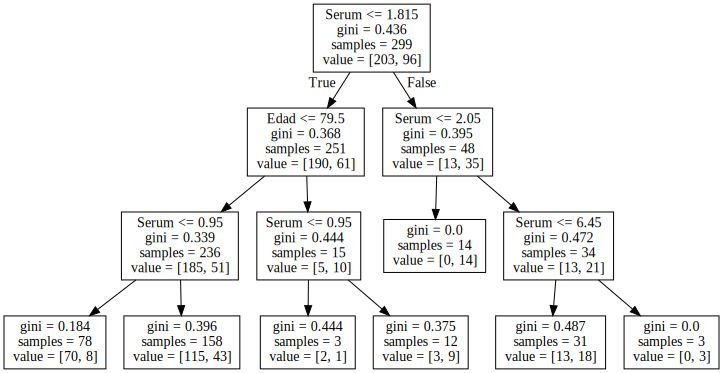

In [55]:
# O con la librería graphviz
import graphviz 

# Export_graphviz
dot_data = tree.export_graphviz(arbol, 
                                out_file=None, 
                                feature_names=['Edad', 'Serum', 'Anemia']) 
graph = graphviz.Source(dot_data) 
graph

## 0405 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo. 

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [56]:
# Predicción
prediccion = arbol.predict(df_resumen[['Edad', 'Serum', 'Anemia']])
prediccion

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score
accuracy_score(df_resumen['Fallece'], prediccion)

0.7725752508361204

# 05 EJEMPLO
Entrenamos un árbol de decisión con todas las variables del set de datos de accidente cardiaco, y evaluamos si la predicción es mejor o peor que utilizando tres variables.

In [96]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [97]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_grande = tree.DecisionTreeClassifier(max_depth=6)

In [99]:
# Matrices de datos
cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
        'ejection_fraction', 'high_blood_pressure', 'platelets', 
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
X = df[cols]
y = df['DEATH_EVENT']

In [100]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
# No utilizamos la variable Time porque da información del target 
# (no la conoceríamos a la hora de hacer una predicción del futuro)

arbol_grande = arbol_grande.fit(X = X, 
                                y = y)
arbol_grande

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_grande, 
                       feature_names=list(df.iloc[:,:-2].columns)))

|--- serum_creatinine <= 1.81
|   |--- ejection_fraction <= 27.50
|   |   |--- serum_sodium <= 143.00
|   |   |   |--- creatinine_phosphokinase <= 685.50
|   |   |   |   |--- platelets <= 275000.00
|   |   |   |   |   |--- age <= 58.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  58.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- platelets >  275000.00
|   |   |   |   |   |--- serum_sodium <= 138.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- serum_sodium >  138.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- creatinine_phosphokinase >  685.50
|   |   |   |   |--- class: 1
|   |   |--- serum_sodium >  143.00
|   |   |   |--- class: 0
|   |--- ejection_fraction >  27.50
|   |   |--- age <= 79.50
|   |   |   |--- serum_creatinine <= 1.45
|   |   |   |   |--- creatinine_phosphokinase <= 6535.00
|   |   |   |   |   |--- platelets <= 332000.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- platelets >  33200

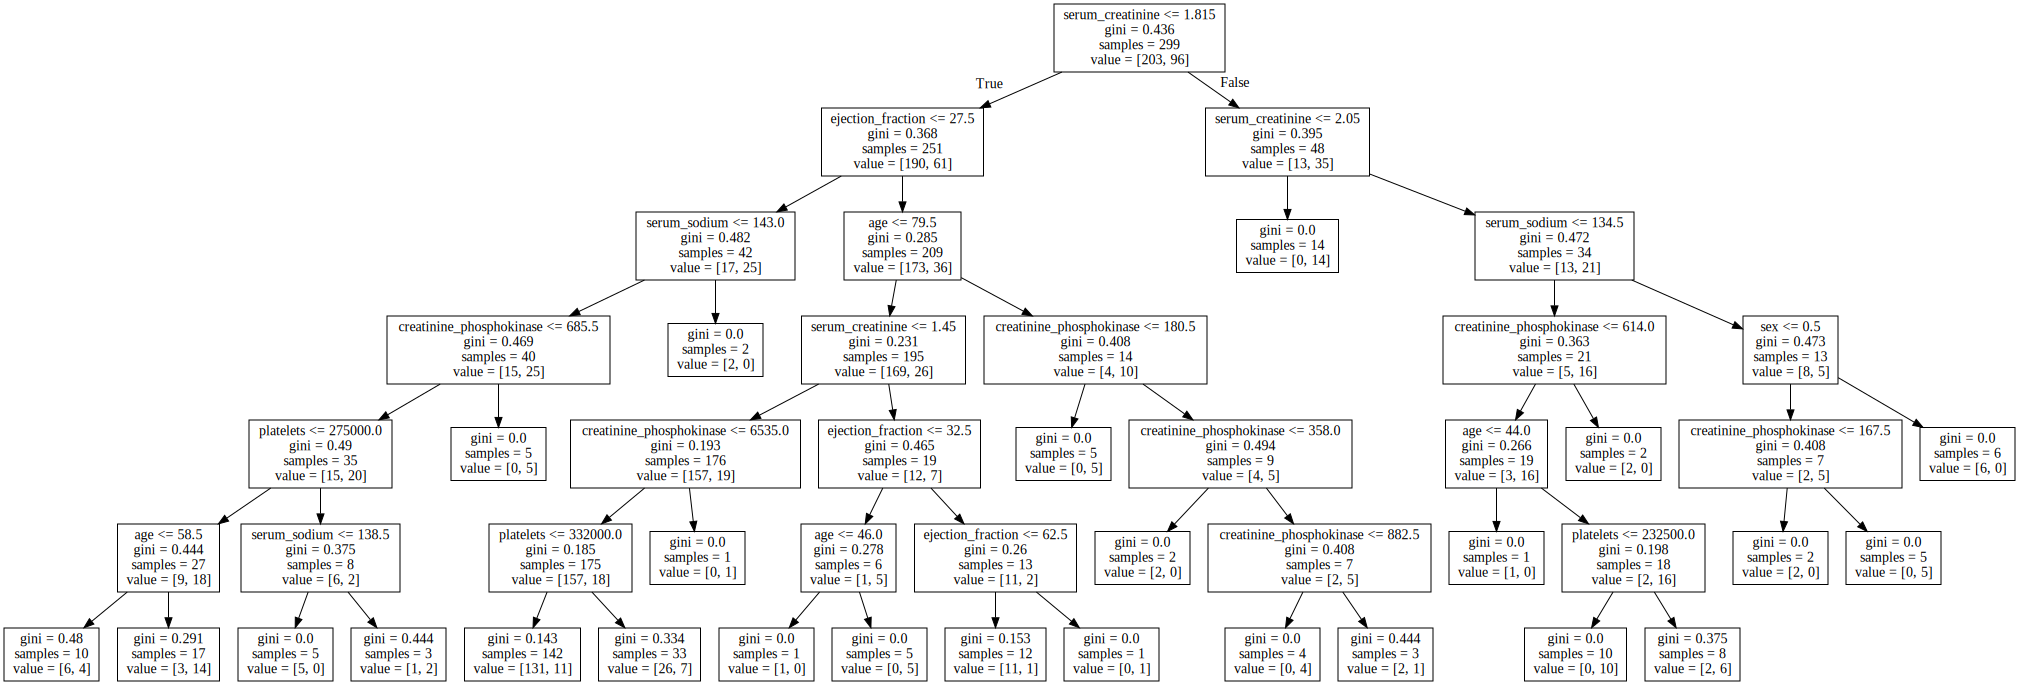

In [102]:
import graphviz 
dot_data = tree.export_graphviz(arbol_grande, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

In [103]:
# Predicción
prediccion = arbol_grande.predict(X)
prediccion

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.8996655518394648

# 06 EJERCICIO TITANIC
Recordais el dataset del Titanic?

Vamos a hacer un árbol de decisión que prediga si alguien fallece o no. 

Para ello utilizaremos un dataset previamente transformado, ya listo para entrenar un árbol. En la próxima clase veremos por qué el dataset tiene que estar en un formato determinado y cómo conseguirlo.

## 0601 Importa el dataset
Puedes encontrarlo en mi github. Este es el link al archivo raw: https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv.

Importa los datos en un dataframe llamado **dataframe df_titanic**.

In [81]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv'

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0


In [82]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 0602 Crea el árbol de decisión
Utiliza una profundidad de 6 capas.

In [83]:
# Crea una lista con las variables que vamos a utilizar para predecir:
# ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
lista = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = df_titanic[lista]
y = df_titanic['Survived']

In [84]:
# Inicializamos un árbol definiendo la profundidad
arbol_titanic = tree.DecisionTreeClassifier(max_depth=6)

In [85]:
# Entrena el árbol con los datos del Titanic
arbol_titanic.fit(X=X, y=y)
arbol_titanic

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 0603 Visualiza el árbol
Qué variables utiliza el árbol para inferir el riesgo de muerte? Tiene sentido?

In [90]:
# con export_test
# Podemos visualizar la estructura
print(tree.export_text(arbol_titanic, 
                       feature_names=list(X.columns)))

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- Age <= 56.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  56.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  28.23
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  28.86
|   |   |   |   |--- Parch <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Parch >  1.50
|   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  24.50
|   |   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |   |--- Fare <= 15.62
|   |   |   |   |   |   |--- class: 1
|   |   |   |  

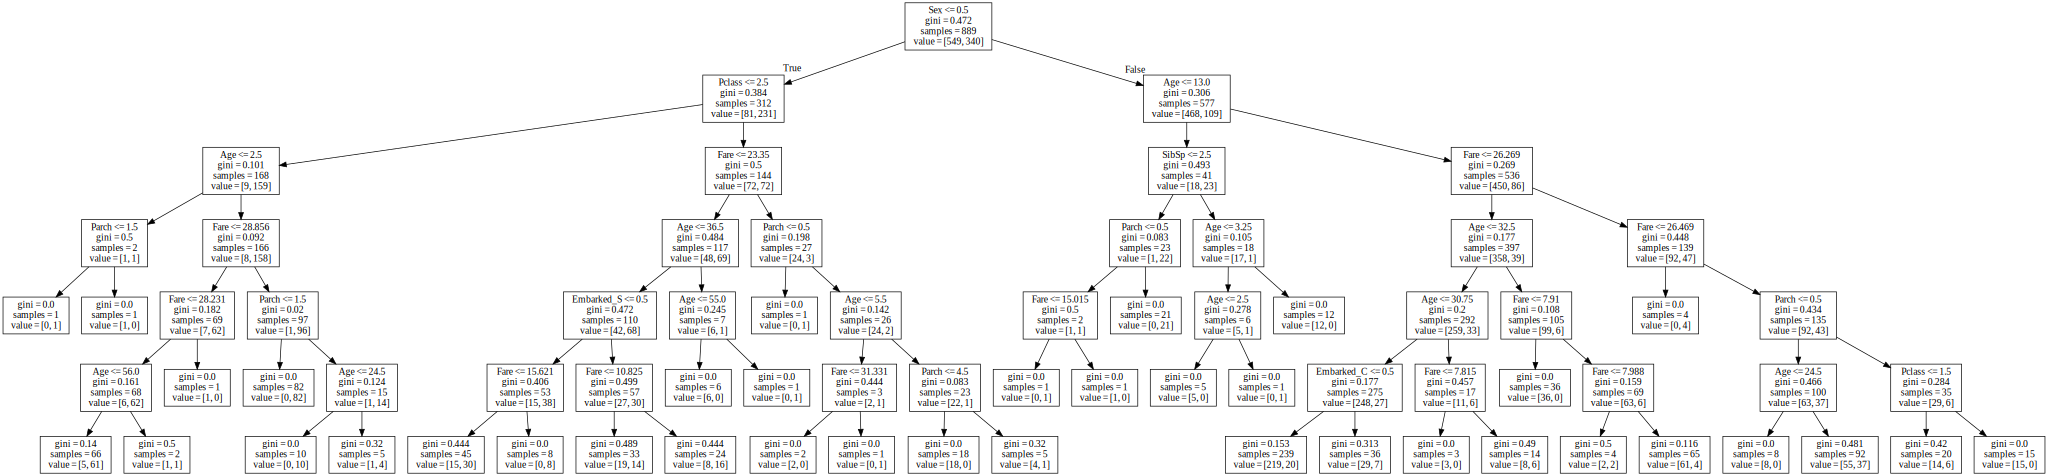

In [92]:
# con export_graphviz
dot_data = tree.export_graphviz(arbol_titanic, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

## 0604 Realiza una predicción
Realiza una predicción con tu árbol y comprueba cuánto ha acertado.

In [94]:
# Predicción
prediccion = arbol_titanic.predict(X)

In [95]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.8571428571428571